# Keystroke Dynamics Challenge
---
---
In this notebook, I conducted the data exploration and understanding part of the challenge. 

Here I will explore the data profusely, looking at it from different angles.

In [1]:
!python --version

Python 3.9.0


In [ ]:
#Requirements
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install xgboost
!pip install shap

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as notebook_tqdm

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
 
import shap
shap.initjs()

import warnings
warnings.filterwarnings("ignore")

from xgboost.sklearn import XGBClassifier

### Data understanding

In [3]:
df_train = pd.read_csv('data/Train_Keystroke.csv')
df_test = pd.read_csv('data/Test_Keystroke.csv')

In [4]:
df_train.head()

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12,UserID
0,0,166,86,271,200,296,364,513,664,752,...,1501,1473,1629,1602,1831,1736,1924,1831,2035,73
1,0,72,196,270,315,417,544,616,694,761,...,1448,1529,1636,1736,1815,1969,2040,2185,2265,32
2,0,31,418,487,623,695,780,820,1239,1319,...,2591,2740,2783,2902,2951,3071,3119,3216,3263,61
3,0,1,1,45,146,201,386,473,594,681,...,1553,1665,1761,1939,2010,2170,2240,2426,2513,77
4,0,71,312,406,1829,1926,2063,2183,2160,2263,...,3208,3309,3431,3607,3783,3784,3911,3911,4058,24


In [5]:
df_test

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,0,71,192,287,359,431,616,687,831,903,...,1519,1591,1735,1809,1968,2039,2135,2209,2376,2447
1,0,53,168,240,408,485,622,664,713,792,...,1353,1400,1457,1496,1688,1760,1786,1856,1986,2088
2,0,72,58,136,232,312,337,428,512,622,...,1192,1291,1377,1459,1532,1740,1741,1807,1927,2066
3,0,82,150,223,244,340,484,567,621,692,...,1356,1444,1453,1573,1573,1644,1813,1864,1976,2068
4,0,86,165,268,291,364,464,621,532,622,...,1204,1292,1268,1389,1486,1607,1742,1854,2454,2532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,100,207,279,361,439,535,631,743,775,...,1449,1569,1671,1809,1847,1919,2032,2080,2199,2332
126,0,69,19,136,243,375,376,411,515,597,...,1019,1107,1179,1327,1539,1619,1723,1798,1875,2003
127,0,60,194,296,271,363,376,496,487,500,...,884,1006,1007,1066,1080,1178,1164,1260,1266,1328
128,0,43,145,217,345,392,414,486,662,697,...,1633,1710,1729,1777,1911,1979,1980,2051,2188,2243


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   press-0     750 non-null    int64
 1   release-0   750 non-null    int64
 2   press-1     750 non-null    int64
 3   release-1   750 non-null    int64
 4   press-2     750 non-null    int64
 5   release-2   750 non-null    int64
 6   press-3     750 non-null    int64
 7   release-3   750 non-null    int64
 8   press-4     750 non-null    int64
 9   release-4   750 non-null    int64
 10  press-5     750 non-null    int64
 11  release-5   750 non-null    int64
 12  press-6     750 non-null    int64
 13  release-6   750 non-null    int64
 14  press-7     750 non-null    int64
 15  release-7   750 non-null    int64
 16  press-8     750 non-null    int64
 17  release-8   750 non-null    int64
 18  press-9     750 non-null    int64
 19  release-9   750 non-null    int64
 20  press-10    750 non-null    int6

In [7]:
df_train.UserID.nunique()

110

In [8]:
df_train.UserID.value_counts()

73     7
60     7
94     7
92     7
16     7
      ..
88     6
52     6
30     6
93     6
103    6
Name: UserID, Length: 110, dtype: int64

In [9]:
print(f'Train shape: {df_train.shape}, number of unique UserIDs: {df_train.UserID.nunique()}')
print(f'Test shape: {df_test.shape}')

Train shape: (750, 27), number of unique UserIDs: 110
Test shape: (130, 26)


### Feature Engineering

<img src="images/keystroke_dynamics.png" style="width: 800px;"/>

**PPT = HT + RPT**

**RRT = RPT + HT**

Press-press time would be equal to Release-release time for different lags. From now including in the analysis **PPT, HT and RPT** (enough to describe user keystroke dynamics). 

In [10]:
def feature_engineering(df):
    
    for i in range(13):
        #create feature for hold time
        df['HT-'+str(i)] = df['release-'+str(i)] - df['press-'+str(i)]
    
    for i in range(1,13):
        #create feature for PPT and RPT and RRT (?)
        #excluding first press, no press before
        df['PPT-'+str(i)] = df['press-'+str(i)] - df['press-'+str(i-1)]
        df['RPT-'+str(i)] = df['release-'+str(i)] - df['press-'+str(i-1)]
    
    return df

In [11]:
df_train_processed = feature_engineering(df_train)
df_test_processed = feature_engineering(df_test)

In [12]:
df_train_processed.head()

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,PPT-8,RPT-8,PPT-9,RPT-9,PPT-10,RPT-10,PPT-11,RPT-11,PPT-12,RPT-12
0,0,166,86,271,200,296,364,513,664,752,...,164,297,105,261,129,358,134,322,95,299
1,0,72,196,270,315,417,544,616,694,761,...,213,247,115,222,207,286,233,304,216,296
2,0,31,418,487,623,695,780,820,1239,1319,...,168,208,189,232,162,211,169,217,145,192
3,0,1,1,45,146,201,386,473,594,681,...,257,352,207,303,274,345,231,301,256,343
4,0,71,312,406,1829,1926,2063,2183,2160,2263,...,183,312,230,352,298,474,177,304,127,274


### Exploratory Data Analysis

##### Let's look at a sample of 10 different UserIDs

In [13]:
user_sample = df_train_processed[df_train_processed.UserID <11]

In [14]:
user_sample.head()

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,PPT-8,RPT-8,PPT-9,RPT-9,PPT-10,RPT-10,PPT-11,RPT-11,PPT-12,RPT-12
19,0,47,184,255,727,776,872,970,1184,1304,...,288,335,120,192,162,232,117,191,49,145
40,0,71,215,287,431,527,711,783,784,855,...,256,328,145,216,239,311,72,146,232,280
47,0,36,180,251,364,445,628,699,724,771,...,194,291,95,141,232,302,71,142,222,287
56,0,120,192,328,280,400,520,640,616,688,...,120,192,168,240,168,288,88,160,199,275
58,0,72,216,264,412,458,568,664,640,760,...,142,190,72,145,96,169,121,192,71,118


In [15]:
user_sample.min()

press-0        0
release-0      0
press-1        0
release-1     78
press-2      127
            ... 
RPT-10       127
PPT-11         5
RPT-11        77
PPT-12        24
RPT-12       118
Length: 64, dtype: int64

In [16]:
user_sample.max()

press-0         0
release-0     120
press-1       448
release-1     502
press-2      1072
             ... 
RPT-10       1871
PPT-11       1134
RPT-11       1191
PPT-12        625
RPT-12        728
Length: 64, dtype: int64

#### Scatterplot RPT vs PPT
PPT = HT + RPT - should be almost linearly related

Text(0.5, 1.0, 'Scatterplot of PPT vs RPT')

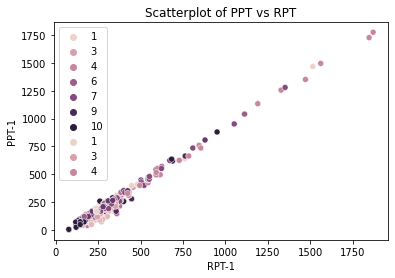

In [17]:
for i in range(1,13):
    ax = sns.scatterplot(x='RPT-'+str(i),y='PPT-'+str(i),hue='UserID',data=user_sample)
  
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:11], labels[:user_sample.UserID.nunique()])
ax.set_title('Scatterplot of PPT vs RPT')

#### Swarm Plots of HT, PPT, RPT (categorical scatterplot with non-overlapping points)

Since we have 12 RPT values per typing pattern (consecutive pairs from 13 key presses), we need to visualise all these durations together. So, we invoke swarmplot for each of these 12 columns back-to-back and seaborn overlays the data from all of these visualisations together.

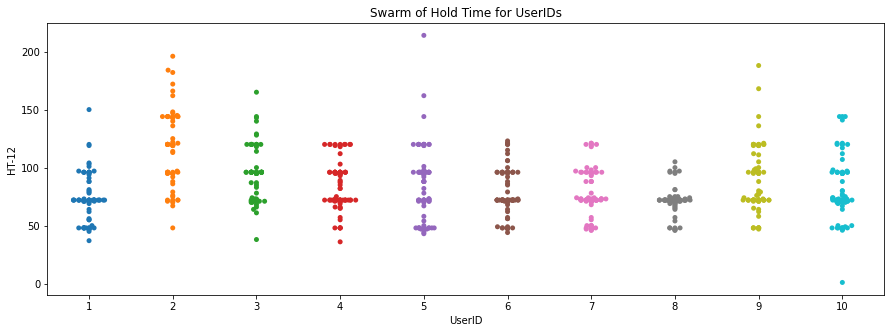

In [18]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='HT-'+str(i),x='UserID',data=user_sample).set_title('Swarm of Hold Time for UserIDs')

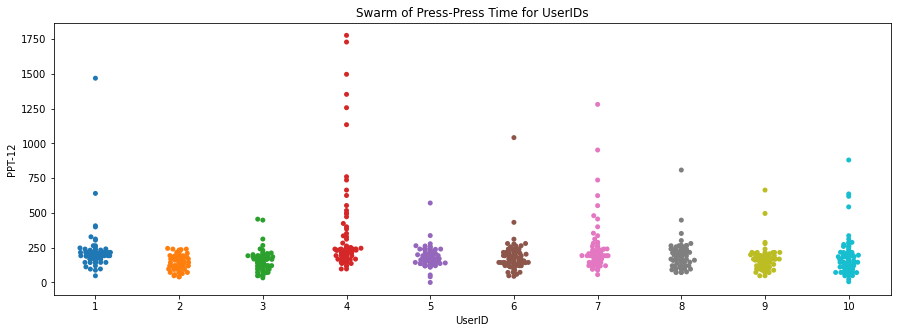

In [19]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='PPT-'+str(i),x='UserID',data=user_sample).set_title('Swarm of Press-Press Time for UserIDs')

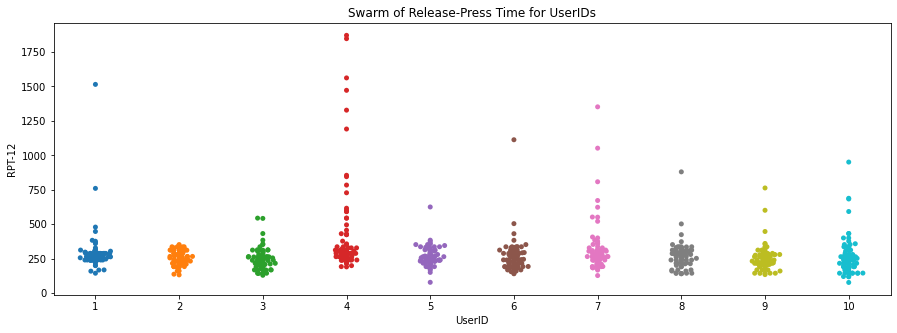

In [20]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='RPT-'+str(i),x='UserID',data=user_sample).set_title('Swarm of Release-Press Time for UserIDs')

- HT is different for each UserID which is correct since each UserID has a different typing speed according to his familiarity with typing.
- PPT, RPT is roughly the same across all UserIDs - using an average duration will not be helpful.

#### Key Sequences
Visualise scatter plots and line plots of how these durations would look in terms of the timestamps of key press events

##### Hold Duration key sequences
- `wide_to_long` -  stacks all these values present in multiple columns into a single column. By sorting in the sequence: UserID, id, key_no, we ensure that all durations of a single typing pattern are together.

In [21]:
user_sample

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,PPT-8,RPT-8,PPT-9,RPT-9,PPT-10,RPT-10,PPT-11,RPT-11,PPT-12,RPT-12
19,0,47,184,255,727,776,872,970,1184,1304,...,288,335,120,192,162,232,117,191,49,145
40,0,71,215,287,431,527,711,783,784,855,...,256,328,145,216,239,311,72,146,232,280
47,0,36,180,251,364,445,628,699,724,771,...,194,291,95,141,232,302,71,142,222,287
56,0,120,192,328,280,400,520,640,616,688,...,120,192,168,240,168,288,88,160,199,275
58,0,72,216,264,412,458,568,664,640,760,...,142,190,72,145,96,169,121,192,71,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,0,74,448,502,715,784,1016,1088,1184,1256,...,240,312,192,288,232,304,99,168,261,309
722,0,72,192,264,412,480,668,742,744,808,...,216,312,120,220,352,424,120,192,266,336
734,0,72,215,303,304,399,615,735,711,759,...,192,264,112,184,120,192,120,168,168,240
740,0,72,256,328,496,568,712,784,968,1040,...,222,288,162,257,808,880,168,215,208,279


##### Hold Time key sequences

In [22]:
drop_cols_HT = ['PPT-'+str(i) for i in range(1,13)] + ['RPT-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)]

user_sample_HT = user_sample.drop(columns=drop_cols_HT)
user_sample_HT['id'] = user_sample_HT.index
user_sample_HT = pd.wide_to_long(user_sample_HT,['press-','HT-'],i='id',j='key_no').sort_values(by=['UserID','id','key_no'])
user_sample_HT

UserID  press-  HT-
id  key_no                     
265 0            1       0   74
    1            1     144   96
    2            1     312   64
    3            1     473   71
    4            1     688   72
...            ...     ...  ...
600 8           10    1416   50
    9           10    1512   48
    10          10    1584   73
    11          10    1728   72
    12          10    1776   96

[884 rows x 3 columns]

<AxesSubplot:xlabel='press-', ylabel='HT-'>

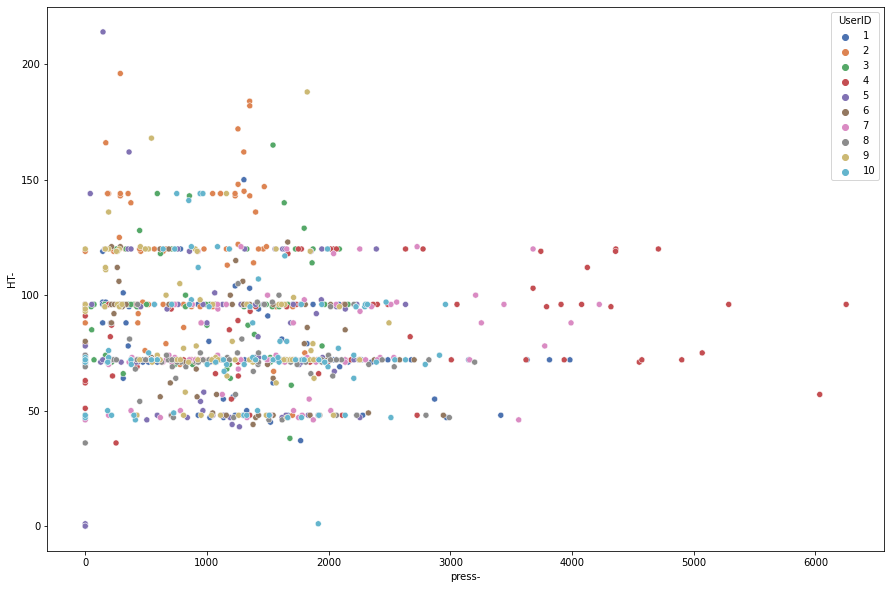

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='HT-',hue='UserID',data=user_sample_HT,palette='deep')

Text(0.5, 1.0, 'HT - Line plots for each key sequence')

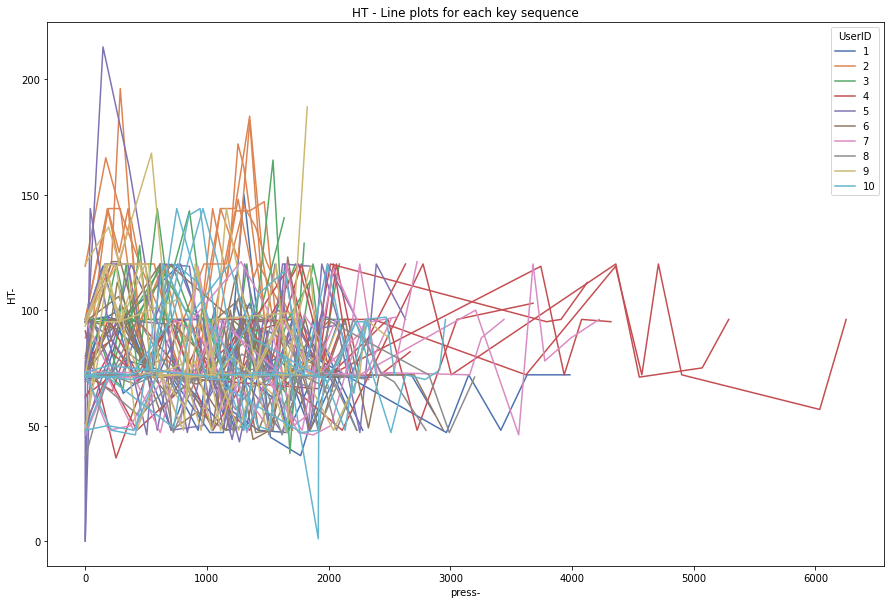

In [24]:
plt.figure(figsize=(15,10))
sns.lineplot(x='press-',y='HT-',hue='UserID',units='id',estimator=None,
             data=user_sample_HT.reset_index(),palette='deep').set_title('HT - Line plots for each key sequence')

##### Press-Press Time key sequences

In [25]:
drop_cols_PPT = ['HT-'+str(i) for i in range(13)] + ['RPT-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

user_sample_PPT = user_sample.drop(columns=drop_cols_PPT)
user_sample_PPT['id'] = user_sample_PPT.index
user_sample_PPT = pd.wide_to_long(user_sample_PPT,['press-','PPT-'],i='id',j='key_no').sort_values(by=['UserID','id','key_no'])

<AxesSubplot:xlabel='press-', ylabel='PPT-'>

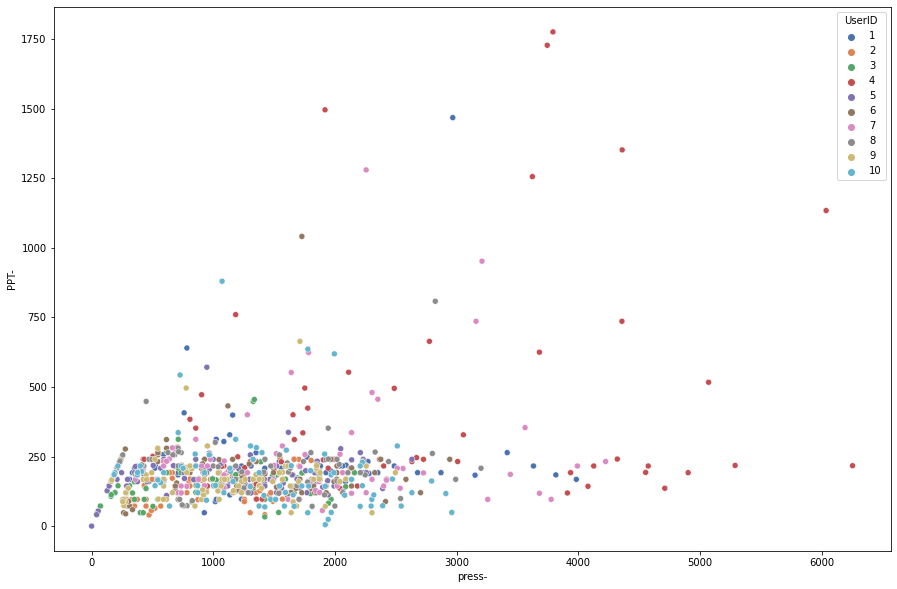

In [26]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='PPT-',hue='UserID',data=user_sample_PPT,palette='deep')

Text(0.5, 1.0, 'PPT - Line plots for each key sequence')

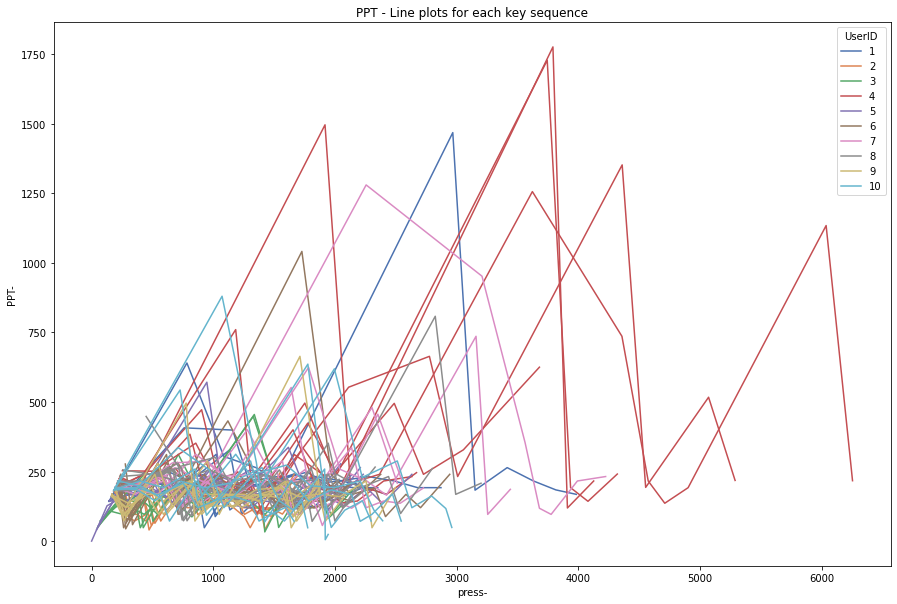

In [27]:
plt.figure(figsize=(15,10))
sns.lineplot(x='press-',y='PPT-',hue='UserID',units='id',estimator=None,
             data=user_sample_PPT.reset_index(),palette='deep').set_title('PPT - Line plots for each key sequence')

##### Release-Press Duration key sequences

In [28]:
drop_cols_RPT = ['HT-'+str(i) for i in range(13)] + ['PPT-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

user_sample_RPT = user_sample.drop(columns=drop_cols_RPT)
user_sample_RPT['id'] = user_sample_RPT.index
user_sample_RPT = pd.wide_to_long(user_sample_RPT,['press-','RPT-'],i='id',j='key_no').sort_values(by=['UserID','id','key_no'])

<AxesSubplot:xlabel='press-', ylabel='RPT-'>

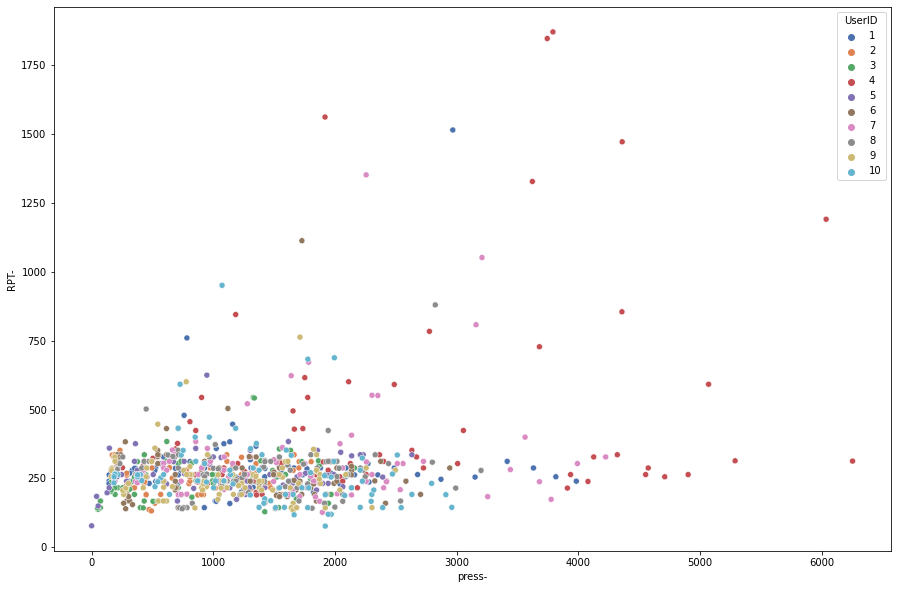

In [29]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='RPT-',hue='UserID',data=user_sample_RPT,palette='deep')

Text(0.5, 1.0, 'RPT - Line plots for each key sequence')

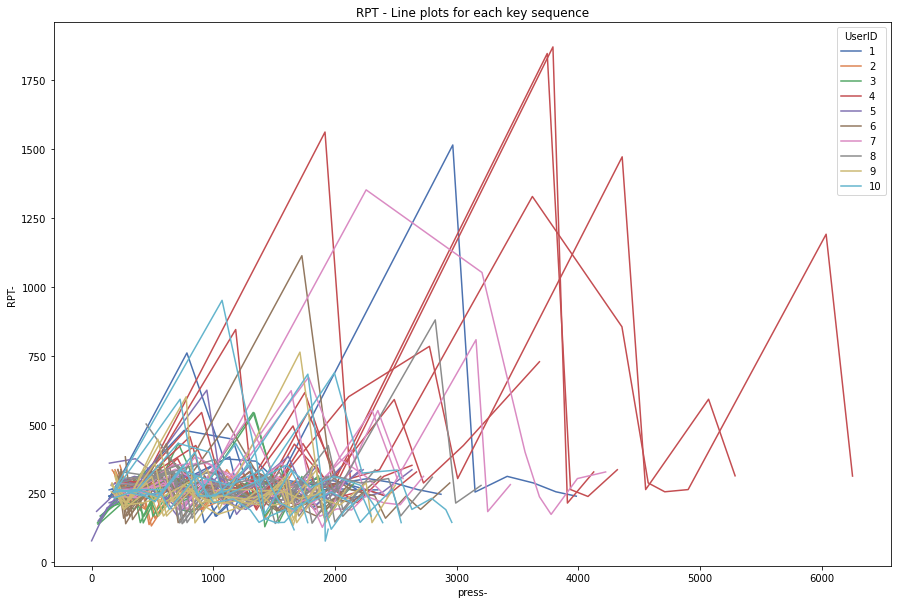

In [30]:
plt.figure(figsize=(15,10))
sns.lineplot(x='press-',y='RPT-',hue='UserID',units='id',estimator=None,
             data=user_sample_RPT.reset_index(),palette='deep').set_title('RPT - Line plots for each key sequence')

- RPT - Same detail as PPT
- UserID 4 - The RPT also suddenly increases and then becomes very low for the next key (this UserID waits for a relatively longer time before typing in 2 keys back to back - UserID 4 typically types in groups of 2 keys)

### Data Preparation
Instead of directly using these durations as inputs, we could group these durations into histograms which would represent groups of different typing speeds. For e.g. a slow typer would have his keystroke durations falling in the histogram bucket of larger durations. At the same time, a fast typer (or perhaps a touch typer) would have his keystroke durations falling in the histogram bucket of smaller durations.

- convert the entire training and test data by using this histogram technique

In [31]:
def data_preparation(df):
    
    cols_drop_ht = df.columns[~df.columns.str.contains(r'press|HT|UserID', case=False)]
    cols_drop_ppt = df.columns[~df.columns.str.contains(r'press|PPT|UserID', case=False)]
    cols_drop_rpt = df.columns[~df.columns.str.contains(r'press|RPT|UserID', case=False)]
            
    df_ht = df.drop(columns=cols_drop_ht)
    df_ht['id'] = df_ht.index
    sort_list_ht = df_ht.columns.intersection(['UserID','id','key_no'])
    df_ht = pd.wide_to_long(df_ht,['press-','HT-'],i='id',j='key_no').sort_values(by=list(sort_list_ht))
    
    df_ppt = df.drop(columns=cols_drop_ppt)
    df_ppt['id'] = df_ppt.index
    sort_list_ppt= df_ppt.columns.intersection(['UserID','id','key_no'])
    df_ppt = pd.wide_to_long(df_ppt,['press-','PPT-'],i='id',j='key_no').sort_values(by=list(sort_list_ppt))
    
    df_rpt = df.drop(columns=cols_drop_rpt)
    df_rpt['id'] = df_rpt.index
    sort_list_rpt= df_rpt.columns.intersection(['UserID','id','key_no'])
    df_rpt = pd.wide_to_long(df_rpt,['press-','RPT-'],i='id',j='key_no').sort_values(by=list(sort_list_rpt))
    
    df_new = df_ht.join(df_ppt.drop(columns=['UserID','press-'], errors='ignore'),rsuffix='PPT_')\
                  .join(df_rpt.drop(columns=['UserID','press-'], errors='ignore'),rsuffix='RPT_')
    
    return df_new

In [32]:
df_train_new = data_preparation(df_train_processed)
df_test_new = data_preparation(df_test_processed)

In [33]:
df_train_new.head()

UserID  press-  HT-   PPT-   RPT-
id  key_no                                   
265 0            1       0   74    NaN    NaN
    1            1     144   96  144.0  240.0
    2            1     312   64  168.0  232.0
    3            1     473   71  161.0  232.0
    4            1     688   72  215.0  287.0

Text(0.5, 1.0, 'Hist of Release-Press Duration')

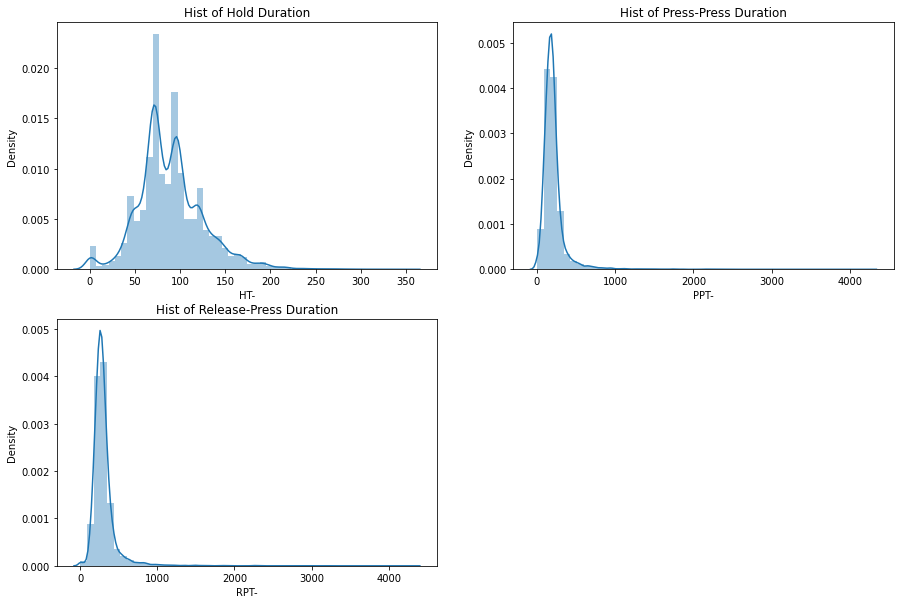

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df_train_new['HT-']).set_title('Hist of Hold Duration')
plt.subplot(2,2,2)
sns.distplot(df_train_new['PPT-']).set_title('Hist of Press-Press Duration')
plt.subplot(2,2,3)
sns.distplot(df_train_new['RPT-']).set_title('Hist of Release-Press Duration')

- `qcut` - checks the distribution of values in the specified column and divides the distribution into equal frequence q number of bins. This ensures that each bin has equal frequency and we can get more meaningful bins.

- setting retbins to True so that we can later use these bins over our test dataset

- encoding the values to labels 0 - 9 in HT_enc, PPT_enc, RPT_enc corresponding to the bins. Since, there are 12 RPT, 12 PPT, 13 HT values corresponding to the 13 key strokes in a typing pattern, we fill the missing RPT, PPT values by -1

In [35]:
n_bins=10

max_ht = df_train_new['HT-'].max()
max_ppt = df_train_new['PPT-'].max()
max_rpt = df_train_new['RPT-'].max()

print('Max values in train are: HT_max: '+ str(max_ht) + ' PPT_max: ' + str(max_ppt) + ' RPT_max: ' + str(max_rpt))
labels = [i for i in range(n_bins)]

Max values in train are: HT_max: 348 PPT_max: 4255.0 RPT_max: 4322.0


In [36]:
df_train_new['HT_enc'], ht_bins = pd.qcut(df_train_new['HT-'],retbins=True,labels=labels,q=n_bins)
df_train_new['PPT_enc'], ppt_bins = pd.qcut(df_train_new['PPT-'],retbins=True,labels=labels,q=n_bins)
df_train_new['RPT_enc'], rpt_bins = pd.qcut(df_train_new['RPT-'],retbins=True,labels=labels,q=n_bins)

df_train_new['HT_enc'] = df_train_new['HT_enc'].astype(str).replace('nan',-1).astype(int)
df_train_new['PPT_enc'] = df_train_new['PPT_enc'].astype(str).replace('nan',-1).astype(float)
df_train_new['RPT_enc'] = df_train_new['RPT_enc'].astype(str).replace('nan',-1).astype(float)

In [37]:
df_train_new

UserID  press-  HT-   PPT-   RPT-  HT_enc  PPT_enc  RPT_enc
id  key_no                                                             
265 0            1       0   74    NaN    NaN       3     -1.0     -1.0
    1            1     144   96  144.0  240.0       5      2.0      3.0
    2            1     312   64  168.0  232.0       1      4.0      2.0
    3            1     473   71  161.0  232.0       2      3.0      2.0
    4            1     688   72  215.0  287.0       3      6.0      5.0
...            ...     ...  ...    ...    ...     ...      ...      ...
606 8          110    1638   97  199.0  296.0       6      5.0      6.0
    9          110    1785   99  147.0  246.0       6      3.0      3.0
    10         110    1928  112  143.0  255.0       7      2.0      3.0
    11         110    2057  129  129.0  258.0       8      2.0      4.0
    12         110    2284  220  227.0  447.0       9      7.0      9.0

[9750 rows x 8 columns]

In [38]:
df_train_new[(df_train_new["UserID"] == 1)][:13]

UserID  press-  HT-   PPT-   RPT-  HT_enc  PPT_enc  RPT_enc
id  key_no                                                             
265 0            1       0   74    NaN    NaN       3     -1.0     -1.0
    1            1     144   96  144.0  240.0       5      2.0      3.0
    2            1     312   64  168.0  232.0       1      4.0      2.0
    3            1     473   71  161.0  232.0       2      3.0      2.0
    4            1     688   72  215.0  287.0       3      6.0      5.0
    5            1     928   48  240.0  288.0       0      7.0      5.0
    6            1    1016   80   88.0  168.0       4      0.0      0.0
    7            1    1232   48  216.0  264.0       0      6.0      4.0
    8            1    1424   94  192.0  286.0       5      5.0      5.0
    9            1    1664   48  240.0  288.0       0      7.0      5.0
    10           1    1872   96  208.0  304.0       5      6.0      6.0
    11           1    2091   69  219.0  288.0       2      7.0      5.0
    12           1    2280   48  189.0  237.0       0      5.0      3.0

In [39]:
max_ht = df_test_new['HT-'].max()
max_ppt = df_test_new['PPT-'].max()
max_rpt = df_test_new['RPT-'].max()

print('Max values in test are: HT_max: '+ str(max_ht) + ' PPT_max: ' + str(max_ppt) + ' RPT_max: ' + str(max_rpt))

Max values in test are: HT_max: 303 PPT_max: 1620.0 RPT_max: 1712.0


In [40]:
df_test_new['HT_enc'] = pd.cut(df_test_new['HT-'],labels=labels,bins=ht_bins)
df_test_new['PPT_enc'] = pd.cut(df_test_new['PPT-'],labels=labels,bins=ppt_bins)
df_test_new['RPT_enc'] = pd.cut(df_test_new['RPT-'],labels=labels,bins=rpt_bins)

df_test_new['HT_enc'] = df_test_new['HT_enc'].astype(str).replace('nan',-1).astype(float)
df_test_new['PPT_enc'] = df_test_new['PPT_enc'].astype(str).replace('nan',-1).astype(float)
df_test_new['RPT_enc'] = df_test_new['RPT_enc'].astype(str).replace('nan',-1).astype(float)

In [41]:
df_test_new

press-  HT-    PPT-    RPT-  HT_enc  PPT_enc  RPT_enc
id  key_no                                                       
0   0            0   71     NaN     NaN     2.0     -1.0     -1.0
    12        2376   71   241.0   312.0     2.0      7.0      6.0
    1          192   95   192.0   287.0     5.0      5.0      5.0
    4          831   72   215.0   287.0     3.0      6.0      5.0
    9         1735   74   216.0   290.0     3.0      6.0      6.0
...            ...  ...     ...     ...     ...      ...      ...
129 1          171   54   171.0   225.0     1.0      4.0      2.0
    10        2995   47   107.0   154.0     0.0      1.0      0.0
    0            0   58     NaN     NaN     1.0     -1.0     -1.0
    3         1426   48  1087.0  1135.0     0.0      9.0      9.0
    12        3306   96   181.0   277.0     5.0      4.0      5.0

[1690 rows x 7 columns]

In [42]:
ht_bins, ppt_bins, rpt_bins, 'No. of buckets: '+str(len(ht_bins)-1)

(array([  0.,  48.,  64.,  71.,  74.,  86.,  96., 100., 118., 136., 348.]),
 array([   0.,   96.,  122.,  144.,  166.,  183.,  199.,  218.,  249.,
         312., 4255.]),
 array([1.000e+00, 1.820e+02, 2.120e+02, 2.340e+02, 2.550e+02, 2.690e+02,
        2.890e+02, 3.130e+02, 3.450e+02, 4.150e+02, 4.322e+03]),
 'No. of buckets: 10')

- 7 keystroke sequences per user (7 or 6)
- 12 different HT, PPT, RPT
- 10 first UserID

Text(0.5, 1.0, 'Swarm plot of binned release-press duration')

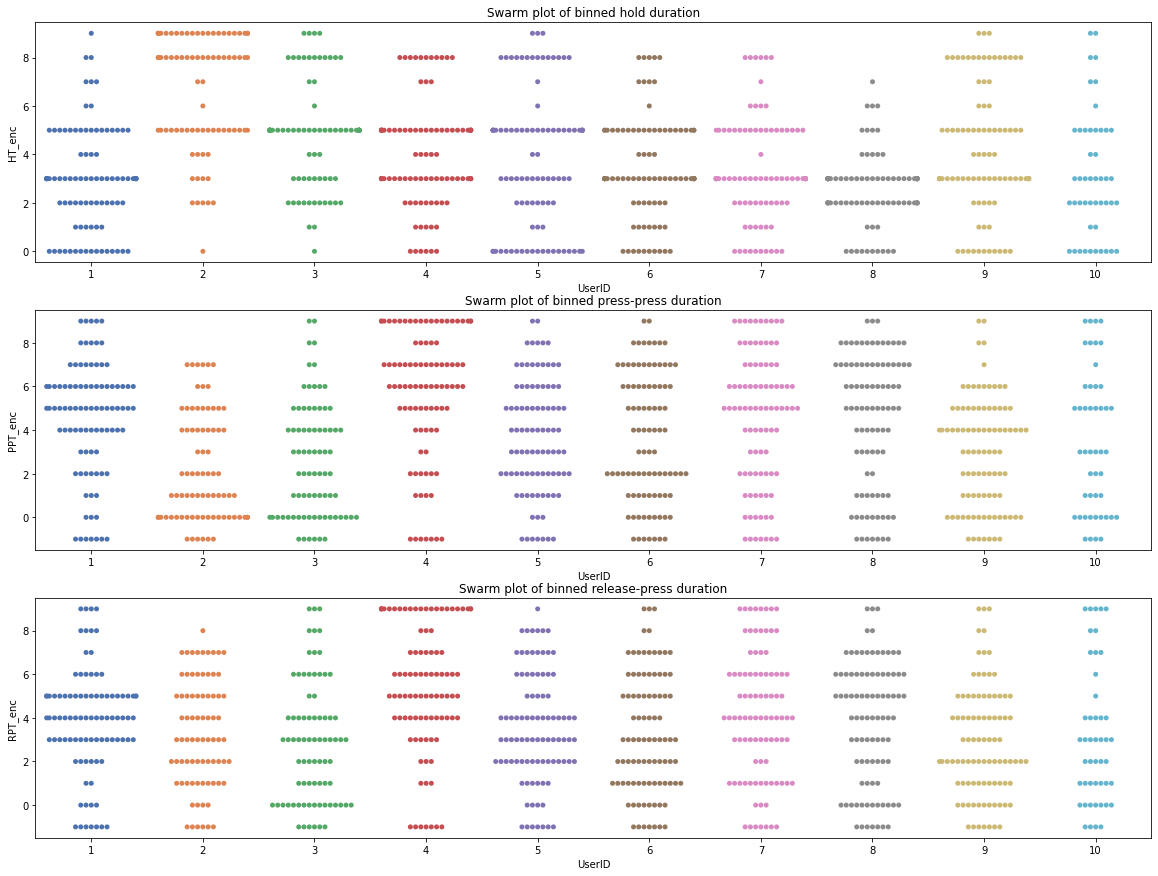

In [43]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.swarmplot(y='HT_enc',x='UserID',data=df_train_new[:7*12*10],palette='deep').set_title('Swarm plot of binned hold duration')
plt.subplot(3,1,2)
sns.swarmplot(y='PPT_enc',x='UserID',data=df_train_new[:7*12*10],palette='deep').set_title('Swarm plot of binned press-press duration')
plt.subplot(3,1,3)
sns.swarmplot(y='RPT_enc',x='UserID',data=df_train_new[:7*12*10],palette='deep').set_title('Swarm plot of binned release-press duration')

This indicates the average speed of every UserID. For example, we can see from the RPT, PPT durations in the swarm plots. 
- For instance, UserID 4 has many encodings in the higher range of bins. 
- At the same time, UserID 10 has more encodings in the lower range of bins. This implies that UserID 4 types relatively slowly as compared to UserID 10.

As you can see if we consider the 7 training samples per UserID, we can identify a signature per UserID in terms of these 3 variables. So, in our next step, we will create the probability of values in each of the bins for each UserID by aggregating all these histograms into 1 summary histogram per UserID.

Here, to aggregate these probability values, we have 2 options -

- Aggregate typing patterns of each UserID into those 10 bins and determine normalised frequency (probability) of durations
- Aggregate typing patterns of each UserID into average bin value for each keystroke

Now, when typing united states, the relative position of consecutive pairs of keystrokes leads to slight variations in these inter-keystroke durations. This will inherently get considered in the 2nd approach.

At the same time, the 1st approach would be best suitable in cases where the length of the text sequences is not fixed. Since in our dataset, the length is fixed, we select the 2nd approach.

#### UserID-level Average Bin per Keystroke Signature
Let's find the average bin for each keystroke for each UserID.

In [44]:
df_train_ht_avg = df_train_new.reset_index().groupby(['UserID','key_no'])['HT_enc'].mean()
df_train_ppt_avg = df_train_new.reset_index().groupby(['UserID','key_no'])['PPT_enc'].mean()
df_train_rpt_avg = df_train_new.reset_index().groupby(['UserID','key_no'])['RPT_enc'].mean()
df_aux = pd.DataFrame({'HT':df_train_ht_avg,'PPT':df_train_ppt_avg,'RPT':df_train_rpt_avg})

ht_avg = df_aux.reset_index().groupby('UserID')['HT'].apply(np.array)
ppt_avg = df_aux.reset_index().groupby('UserID')['PPT'].apply(np.array)
rpt_avg = df_aux.reset_index().groupby('UserID')['RPT'].apply(np.array)

df_train_user_avg = pd.DataFrame({'HT': ht_avg, 'PPT': ppt_avg, 'RPT': rpt_avg})

df_train_user_avg = pd.DataFrame(df_train_user_avg.HT.tolist(),index = df_train_user_avg.index).add_prefix('HT_')\
              .join(pd.DataFrame(df_train_user_avg.PPT.tolist(),index = df_train_user_avg.index).add_prefix('PPT_'))\
              .join(pd.DataFrame(df_train_user_avg.RPT.tolist(),index = df_train_user_avg.index).add_prefix('RPT_'))

In [45]:
df_train_user_avg

,HT_0,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,...,RPT_3,RPT_4,RPT_5,RPT_6,RPT_7,RPT_8,RPT_9,RPT_10,RPT_11,RPT_12
UserID,,,,,,,,,,,,,,,,,,,,,
1,3.571429,5.428571,5.000000,2.571429,2.714286,1.428571,4.000000,2.857143,2.571429,0.571429,...,5.571429,5.571429,5.000000,1.142857,4.285714,4.571429,5.428571,4.857143,3.857143,3.285714
2,5.000000,8.666667,8.500000,7.333333,6.000000,5.333333,3.500000,4.500000,8.666667,8.500000,...,3.333333,0.500000,5.333333,2.166667,2.333333,6.000000,3.500000,4.000000,1.166667,5.833333
3,3.333333,4.166667,3.500000,6.500000,4.333333,7.500000,4.833333,5.000000,2.666667,3.333333,...,4.166667,0.166667,6.833333,3.333333,4.500000,3.333333,2.833333,6.166667,0.166667,5.000000
4,2.571429,3.142857,2.714286,3.571429,4.000000,3.000000,2.857143,7.000000,2.714286,7.571429,...,8.714286,3.571429,5.857143,4.142857,9.000000,5.428571,6.142857,4.571429,5.857143,7.285714
5,1.857143,6.142857,5.714286,1.714286,5.000000,4.142857,0.285714,4.571429,1.714286,6.142857,...,5.142857,3.285714,4.571429,4.428571,4.428571,2.000000,3.285714,2.714286,2.571429,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3.000000,1.285714,1.285714,2.285714,2.857143,1.714286,1.714286,3.000000,3.142857,1.285714,...,7.285714,1.714286,3.428571,4.571429,3.857143,2.285714,1.571429,4.857143,1.714286,4.714286
107,1.428571,8.285714,6.857143,6.857143,3.714286,2.714286,3.285714,3.857143,2.714286,4.000000,...,2.428571,0.142857,3.714286,3.000000,1.571429,0.714286,1.857143,7.142857,3.428571,0.000000
108,1.714286,4.285714,2.000000,7.571429,2.714286,2.142857,1.285714,2.428571,4.000000,2.714286,...,4.428571,1.285714,5.714286,5.142857,3.285714,5.000000,4.000000,5.428571,1.571429,4.142857


In [46]:
df_test_ht_avg = df_test_new.reset_index().groupby(['id','key_no'])['HT_enc'].mean()
df_test_ppt_avg = df_test_new.reset_index().groupby(['id','key_no'])['PPT_enc'].mean()
df_test_rpt_avg = df_test_new.reset_index().groupby(['id','key_no'])['RPT_enc'].mean()
df_aux = pd.DataFrame({'HT':df_test_ht_avg,'PPT':df_test_ppt_avg,'RPT':df_test_rpt_avg})

ht_avg = df_aux.reset_index().groupby('id')['HT'].apply(np.array)
ppt_avg = df_aux.reset_index().groupby('id')['PPT'].apply(np.array)
rpt_avg = df_aux.reset_index().groupby('id')['RPT'].apply(np.array)

df_test_user_avg = pd.DataFrame({'HT': ht_avg, 'PPT': ppt_avg, 'RPT': rpt_avg})

df_test_user_avg = pd.DataFrame(df_test_user_avg.HT.tolist(),index = df_test_user_avg.index).add_prefix('HT_')\
              .join(pd.DataFrame(df_test_user_avg.PPT.tolist(),index = df_test_user_avg.index).add_prefix('PPT_'))\
              .join(pd.DataFrame(df_test_user_avg.RPT.tolist(),index = df_test_user_avg.index).add_prefix('RPT_'))

In [47]:
df_test_user_avg

,HT_0,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,...,RPT_3,RPT_4,RPT_5,RPT_6,RPT_7,RPT_8,RPT_9,RPT_10,RPT_11,RPT_12
id,,,,,,,,,,,,,,,,,,,,,
0,2.0,5.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,3.0,...,7.0,5.0,4.0,1.0,1.0,6.0,6.0,6.0,3.0,6.0
1,1.0,3.0,4.0,0.0,4.0,7.0,0.0,2.0,0.0,0.0,...,4.0,0.0,5.0,1.0,2.0,2.0,0.0,6.0,0.0,6.0
2,3.0,4.0,4.0,5.0,7.0,7.0,7.0,5.0,6.0,4.0,...,1.0,5.0,5.0,2.0,1.0,8.0,4.0,8.0,5.0,7.0
3,4.0,3.0,5.0,4.0,2.0,2.0,2.0,2.0,5.0,8.0,...,7.0,1.0,1.0,6.0,5.0,4.0,2.0,1.0,6.0,3.0
4,4.0,7.0,3.0,9.0,5.0,7.0,0.0,7.0,5.0,8.0,...,7.0,0.0,6.0,1.0,2.0,5.0,1.0,7.0,8.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,6.0,3.0,4.0,5.0,0.0,2.0,8.0,9.0,8.0,9.0,...,5.0,3.0,2.0,4.0,7.0,8.0,8.0,3.0,2.0,6.0
126,2.0,7.0,8.0,0.0,4.0,8.0,9.0,9.0,5.0,9.0,...,0.0,2.0,6.0,3.0,5.0,1.0,6.0,9.0,4.0,5.0
127,1.0,7.0,5.0,8.0,0.0,9.0,3.0,9.0,8.0,1.0,...,2.0,0.0,4.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0


#### User-level Complete Collection of Bins per Keystroke
Instead of finding the average bin for each keystroke over 7 typing patterns, we retain all of the typing patterns. This could help us in using KNN to identify the closest key dynamics signature for a user.

In [48]:
df_train_ht_all = df_train_new.reset_index().groupby(['UserID','id'])['HT_enc'].apply(np.array)
df_train_ppt_all = df_train_new.reset_index().groupby(['UserID','id'])['PPT_enc'].apply(np.array)
df_train_rpt_all = df_train_new.reset_index().groupby(['UserID','id'])['RPT_enc'].apply(np.array)
df_train_all = pd.DataFrame({'HT':df_train_ht_all,'PPT':df_train_ppt_all,'RPT':df_train_rpt_all})

df_train_user_all = pd.DataFrame(df_train_all.HT.tolist(),index = df_train_all.index).add_prefix('HT_')\
              .join(pd.DataFrame(df_train_all.PPT.tolist(),index = df_train_all.index).add_prefix('PPT_'))\
              .join(pd.DataFrame(df_train_all.RPT.tolist(),index = df_train_all.index).add_prefix('RPT_'))\
              .reset_index().set_index('UserID').drop(columns=['id'])

In [49]:
df_train_user_all

,HT_0,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,...,RPT_3,RPT_4,RPT_5,RPT_6,RPT_7,RPT_8,RPT_9,RPT_10,RPT_11,RPT_12
UserID,,,,,,,,,,,,,,,,,,,,,
1,3,5,1,2,3,0,4,0,5,0,...,2.0,5.0,5.0,0.0,4.0,5.0,5.0,6.0,5.0,3.0
1,5,6,5,2,5,1,7,3,4,0,...,7.0,6.0,8.0,1.0,3.0,6.0,5.0,5.0,4.0,3.0
1,2,3,5,3,0,3,5,3,3,1,...,5.0,2.0,3.0,0.0,3.0,5.0,6.0,4.0,4.0,4.0
1,3,5,7,2,2,0,0,9,0,0,...,5.0,4.0,8.0,0.0,7.0,4.0,5.0,4.0,4.0,4.0
1,2,5,8,3,7,3,5,4,3,3,...,8.0,8.0,5.0,3.0,1.0,5.0,6.0,5.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1,3,2,5,6,8,5,4,4,5,...,7.0,1.0,7.0,0.0,5.0,4.0,8.0,8.0,7.0,7.0
110,4,5,5,9,0,9,7,2,8,5,...,9.0,1.0,6.0,3.0,5.0,3.0,6.0,0.0,3.0,8.0
110,6,1,1,8,4,9,7,6,7,5,...,7.0,2.0,7.0,2.0,8.0,6.0,7.0,4.0,3.0,8.0


In [50]:
df_test_ht_all = df_test_new.reset_index().groupby(['id'])['HT_enc'].apply(np.array)
df_test_ppt_all = df_test_new.reset_index().groupby(['id'])['PPT_enc'].apply(np.array)
df_test_rpt_all = df_test_new.reset_index().groupby(['id'])['RPT_enc'].apply(np.array)
df_test_all = pd.DataFrame({'HT':df_test_ht_all,'PPT':df_test_ppt_all,'RPT':df_test_rpt_all})

df_test_user_all = pd.DataFrame(df_test_all.HT.tolist(),index = df_test_all.index).add_prefix('HT_')\
              .join(pd.DataFrame(df_test_all.PPT.tolist(),index = df_test_all.index).add_prefix('PPT_'))\
              .join(pd.DataFrame(df_test_all.RPT.tolist(),index = df_test_all.index).add_prefix('RPT_'))

In [51]:
df_test_user_all

,HT_0,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,...,RPT_3,RPT_4,RPT_5,RPT_6,RPT_7,RPT_8,RPT_9,RPT_10,RPT_11,RPT_12
id,,,,,,,,,,,,,,,,,,,,,
0,2.0,2.0,5.0,3.0,3.0,3.0,5.0,2.0,2.0,3.0,...,5.0,6.0,3.0,1.0,1.0,4.0,6.0,6.0,7.0,3.0
1,0.0,3.0,4.0,4.0,7.0,0.0,3.0,2.0,7.0,0.0,...,7.0,6.0,4.0,3.0,2.0,5.0,2.0,1.0,-1.0,0.0
2,6.0,5.0,4.0,4.0,2.0,9.0,7.0,3.0,7.0,7.0,...,3.0,5.0,8.0,2.0,-1.0,5.0,5.0,7.0,1.0,0.0
3,2.0,3.0,8.0,5.0,5.0,2.0,1.0,2.0,2.0,5.0,...,1.0,3.0,1.0,6.0,5.0,6.0,4.0,1.0,7.0,-1.0
4,3.0,9.0,5.0,4.0,8.0,8.0,7.0,5.0,7.0,7.0,...,9.0,1.0,7.0,4.0,5.0,2.0,8.0,6.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3.0,0.0,9.0,8.0,5.0,6.0,8.0,0.0,4.0,8.0,...,8.0,5.0,-1.0,4.0,2.0,2.0,6.0,7.0,3.0,2.0
126,8.0,8.0,9.0,4.0,9.0,0.0,8.0,9.0,2.0,4.0,...,2.0,5.0,0.0,5.0,3.0,-1.0,4.0,1.0,9.0,0.0
127,1.0,1.0,8.0,0.0,9.0,7.0,5.0,1.0,5.0,9.0,...,0.0,4.0,6.0,0.0,-1.0,0.0,7.0,2.0,0.0,0.0


## Models

#### KNN
Here, you could either simply use DF: df_train_user_avg and find Euclidean distance to identify the closest user (KNN with 1 neighbour)

Or, KNN could be used on the DF: df_train_user_all having 8 training examples per user

In [52]:
knn = KNeighborsClassifier(1)
X_train = df_train_user_avg.reset_index().drop(columns=['UserID'])
y_train = df_train_user_avg.index

knn.fit(X_train, y_train)

accuracy_score(knn.predict(X_train), y_train)

1.0

Our test dataset does not have contain labels. In the above scenario, since we had summarised 39 columns (13 x 3 types of duration bins) per user, we have 130 rows. Each corresponding to 1 user. Thus, it was impossible to create validation dataset to determine real-world prediction accuracy.

But if we consider 7 samples per user, we can consider few of these for validation. Now, since we have 110 users but only 7 samples per user, we need to ensure that enough samples per user are present in training set, so that during test time, at least few samples would be present for each test user. For this, we perform StratifiedShuffleSplit.

Here, I am using n_splits as 5 which means 5 different splits will be created (for 5-fold cross validation) and test_size as 0.2 resulting in (7 x 0.2) = 1.4 test samples for (8 - 1.4) = 6.6 training samples.

In [53]:
def getCrossValidationAccuracy(X, y, n_neighbours):
    knn = KNeighborsClassifier(n_neighbours)
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    acc = []
    for train_index, test_index in sss.split(X, y):
        knn.fit(X.loc[train_index],y[train_index])
        acc += [accuracy_score(knn.predict(X.loc[test_index]), y[test_index])]
    return sum(acc) / len(acc)

Accuracies: [0.632, 0.5533333333333333, 0.576, 0.5746666666666667, 0.5880000000000001, 0.596]


Text(0.5, 1.0, 'Cross-Val Accuracy v/s no. of neighbours')

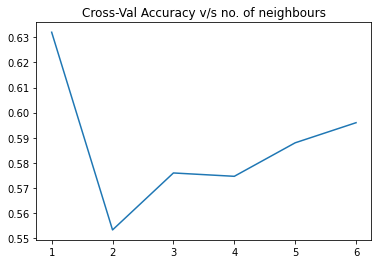

In [54]:
X_train_all = df_train_user_all.reset_index().drop(columns=['UserID'])
y_train_all = df_train_user_all.index

allAttemptsAcc = [getCrossValidationAccuracy(X_train_all, y_train_all, i) for i in range(1,7)]
print('Accuracies:',allAttemptsAcc)
sns.lineplot(y=allAttemptsAcc,x=range(1,7)).set_title('Cross-Val Accuracy v/s no. of neighbours')

From the above plot, we can see that we get the highest accuracy, if we use n_neighbours = 1 - getting only most similar UserID

In [57]:
knn = KNeighborsClassifier(1)
knn.fit(X_train_all, y_train_all)

X_test_all = df_test_user_all.reset_index().drop(columns=['id'])
y_test_all = knn.predict(X_test_all)
pd.DataFrame({'id':X_test_all.index,'user':y_test_all},index=X_test_all.index).to_csv('data/baseline.csv',index=False)

In [70]:
explainer = shap.KernelExplainer(knn.predict, X_train_all)
shap_values = explainer.shap_values(X_test_all)

Using 750 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|███████████████████████████████████████| 130/130 [2:17:10<00:00, 63.31s/it]


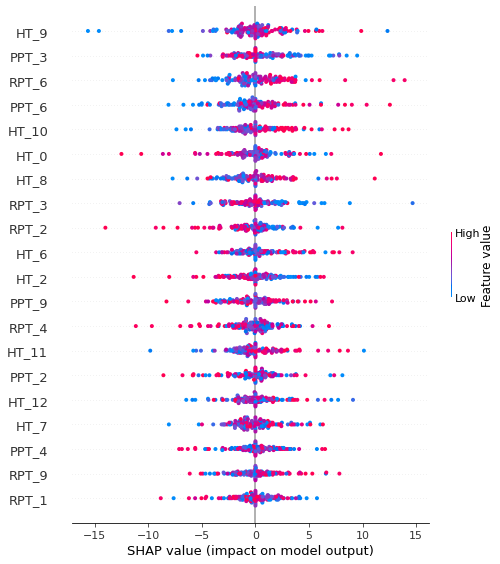

In [72]:
shap.summary_plot(shap_values, X_test_all)

In [75]:
shap.force_plot(explainer.expected_value, shap_values[1], X_test_all.iloc[[2]])

In [76]:
shap.force_plot(explainer.expected_value, shap_values[1],X_test_all.iloc[1,:])

#### XGB Model
Although this dataset is very small - 7 samples per class and 39 feature columns, let's still try to use XGB for this dataset. Here, as well, let's analyse the cross validation accuracy to be sure that this model can be reliable.

In [ ]:
xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=10,
    max_depth=5,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'multi:softmax',
    num_class=X_train_all.nunique(),
    nthread=4,
    seed=27)
param_search = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100,200,210,230,250,270,290,310,330],
    'max_depth': range(4,10,1),
}
gsearch = GridSearchCV(estimator = xgb,param_grid = param_search, scoring='accuracy',n_jobs=4,cv=StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0), verbose=0)
gsearch.fit(X_train_all, y_train_all)

In [79]:
print('Best Estimator:\n',gsearch.best_estimator_)

Best Estimator:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=4, nthread=4,
              num_class=HT_...
PPT_3     10
PPT_4     10
PPT_5     10
PPT_6     10
PPT_7     10
PPT_8     10
PPT_9     10
PPT_10    10
PPT_11    10
PPT_12    10
RPT_0      1
RPT_1     10
RPT_2     10
RPT_3     10
RPT_4     10
RPT_5     10
RPT_6     10
RPT_7     10
RPT_8     10
RPT_9     10
RPT_10    10
RPT_11    10
RPT_12    10
dtype: int64,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=27, subsample=0.8,

In [80]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
accs = []
for train_index, test_index in sss.split(X_train_all, y_train_all):
    gsearch.best_estimator_.fit(X_train_all.loc[train_index],y_train_all[train_index])
    acc = accuracy_score(gsearch.best_estimator_.predict(X_train_all.loc[test_index]),y_train_all[test_index])
    print('Accuracy Score:', acc)
    accs += [acc]
print('Average Accuracy:',sum(accs)/len(accs))

[22:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.72
[22:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.68
[22:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.6933333333333334
[22:52:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.c

In [81]:
gsearch.best_estimator_.fit(X_train_all,y_train_all)

X_test_all = df_test_user_all.reset_index().drop(columns=['id'])
y_test_all = gsearch.best_estimator_.predict(X_test_all)


pd.DataFrame({'idx':X_test_all.index,'user':y_test_all},index=X_test_all.index).to_csv('data/xgboost.csv',index=False)

[22:53:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [82]:
pd.DataFrame({'id':X_test_all.index,'user':y_test_all},index=X_test_all.index)

,id,user
0,0,15
1,1,61
2,2,10
3,3,32
4,4,107
...,...,...
125,125,67
126,126,94
127,127,75
128,128,61


In [83]:
explainer = shap.TreeExplainer(gsearch.best_estimator_)
shap_values = explainer.shap_values(X_train_all)

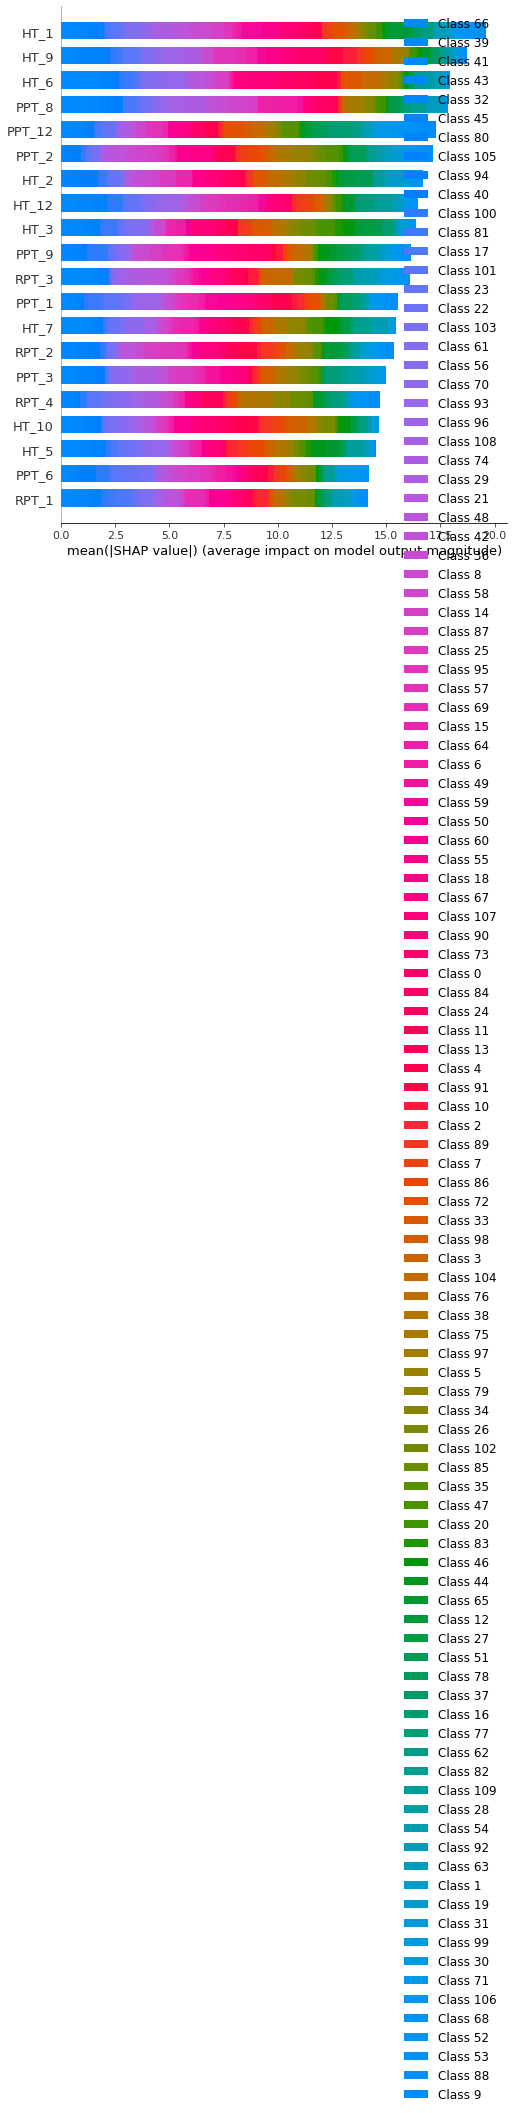


[22:38:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with t

In [84]:
shap.summary_plot(shap_values, X_test_all)

In [125]:
## Check the type of the output when calculating SHAP values for a multi-class target
print(type(shap_values))

## Check the type of the first item in the list
print(type(shap_values[0]))
print(shap_values[0])

## Check the number of items in the list
print(len(shap_values))

<class 'list'>
<class 'numpy.ndarray'>
[[ 0.          0.14858764 -0.35892382 ...  0.          0.06774433
   0.9621832 ]
 [ 0.          0.14858764  0.37025544 ...  0.          0.06774433
   0.9538469 ]
 [ 0.         -0.17720675  0.3770156  ...  0.          0.06774433
   0.16256756]
 ...
 [ 0.         -0.15523227 -0.33446872 ...  0.         -0.08992785
  -0.6574779 ]
 [ 0.          0.1281969  -0.24909899 ...  0.          0.06774433
  -0.6789493 ]
 [ 0.         -0.15523227 -0.33446872 ...  0.          0.06774433
  -0.6574779 ]]
110


In [105]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test_all.iloc[1])

In [116]:
np.unique(y_test_all)

array([  6,   8,   9,  10,  11,  12,  13,  14,  15,  17,  18,  20,  21,
        22,  25,  26,  27,  32,  33,  34,  36,  37,  38,  40,  43,  46,
        47,  48,  50,  52,  55,  57,  61,  65,  67,  68,  69,  72,  73,
        75,  76,  78,  80,  83,  84,  85,  86,  88,  89,  93,  94,  96,
        97,  98, 101, 102, 103, 105, 107])

In [119]:
X_rand

,HT_0,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,...,RPT_3,RPT_4,RPT_5,RPT_6,RPT_7,RPT_8,RPT_9,RPT_10,RPT_11,RPT_12
506,0,0,0,3,6,4,1,7,0,9,...,2.0,1.0,9.0,2.0,9.0,0.0,4.0,1.0,0.0,4.0


In [123]:
X_rand = X_train_all.sample(1, random_state=42)
idx = X_rand.index.values[0]

explainer = shap.TreeExplainer(gsearch.best_estimator_)
shap_values = explainer.shap_values(X_train_all)
shap.initjs()
for which_class in np.unique(y_test_all):
    print("UserID - " + str(which_class))
    display(shap.force_plot(explainer.expected_value[which_class], shap_values[which_class][0],  X_rand))

UserID - 6


UserID - 8


UserID - 9


UserID - 10


UserID - 11


UserID - 12


UserID - 13


UserID - 14


UserID - 15


UserID - 17


UserID - 18


UserID - 20


UserID - 21


UserID - 22


UserID - 25


UserID - 26


UserID - 27


UserID - 32


UserID - 33


UserID - 34


UserID - 36


UserID - 37


UserID - 38


UserID - 40


UserID - 43


UserID - 46


UserID - 47


UserID - 48


UserID - 50


UserID - 52


UserID - 55


UserID - 57


UserID - 61


UserID - 65


UserID - 67


UserID - 68


UserID - 69


UserID - 72


UserID - 73


UserID - 75


UserID - 76


UserID - 78


UserID - 80


UserID - 83


UserID - 84


UserID - 85


UserID - 86


UserID - 88


UserID - 89


UserID - 93


UserID - 94


UserID - 96


UserID - 97


UserID - 98


UserID - 101


UserID - 102


UserID - 103


UserID - 105


UserID - 107
